In [19]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')

In [22]:
Wine = pd.read_csv("WineQT.csv")

In [24]:
#Lets look at the first 5 rows of the dataset
print (Wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [26]:
Wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [28]:
Wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [30]:
#Checking for null values
Wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

### Exploratory Data Analysis

In [33]:

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline


<Axes: xlabel='quality', ylabel='fixed acidity'>

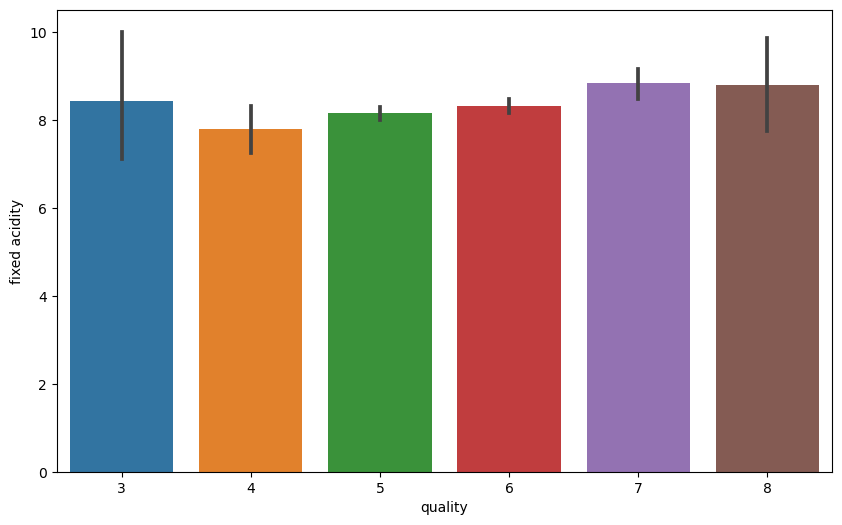

In [36]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = Wine)

<Axes: xlabel='quality', ylabel='volatile acidity'>

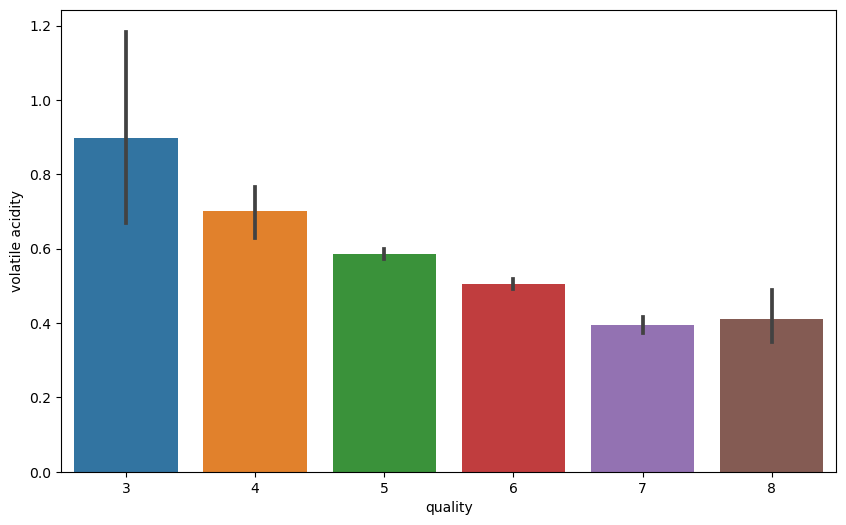

In [38]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = Wine)

<Axes: xlabel='quality', ylabel='citric acid'>

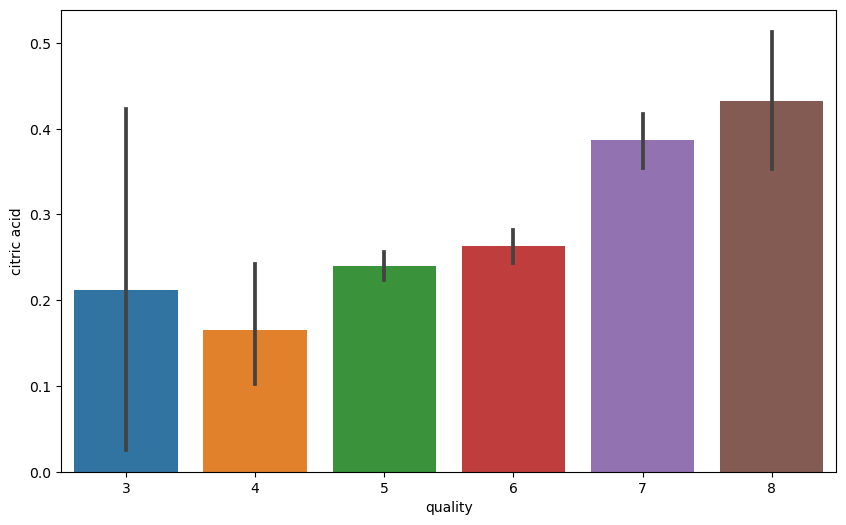

In [40]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = Wine)

<Axes: xlabel='quality', ylabel='residual sugar'>

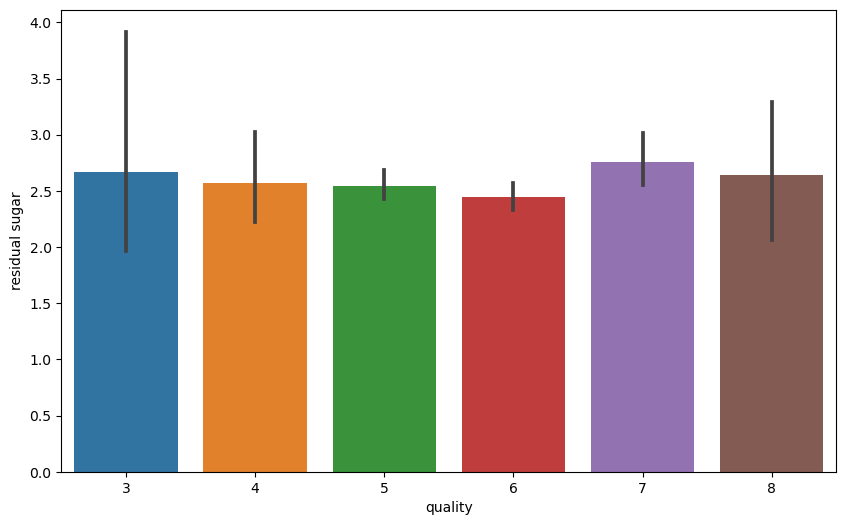

In [42]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = Wine)

<Axes: xlabel='quality', ylabel='chlorides'>

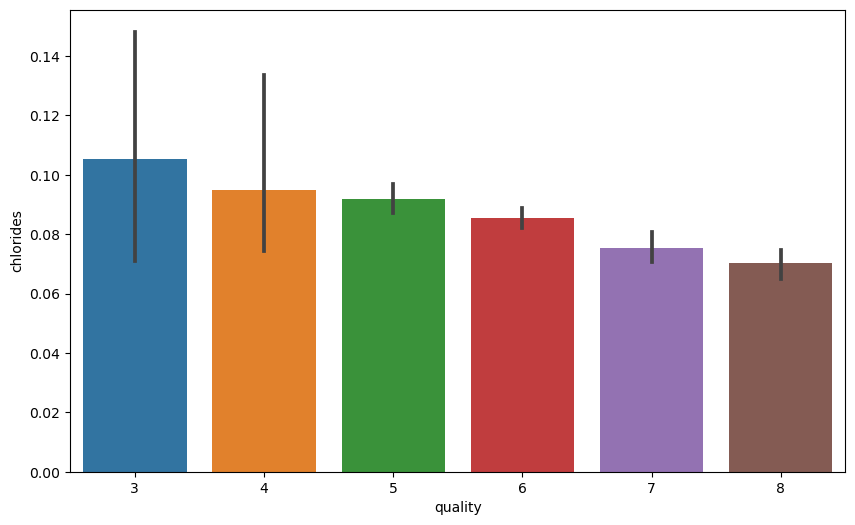

In [44]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = Wine)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

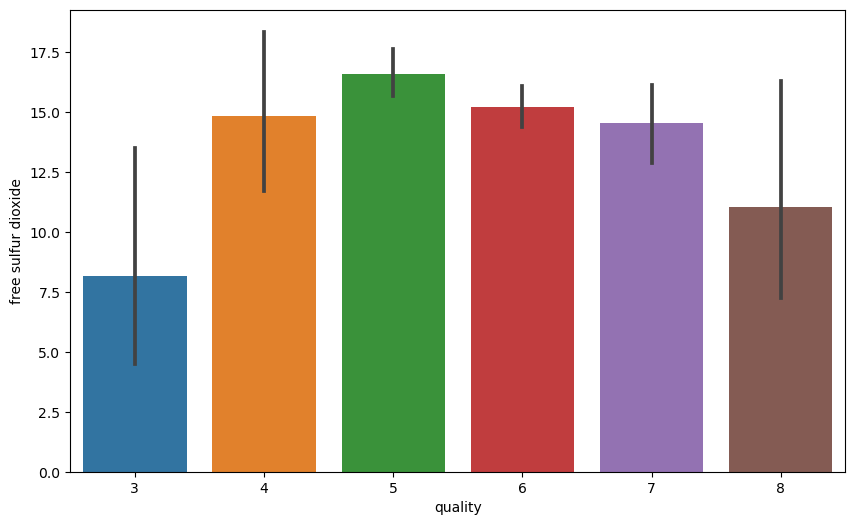

In [46]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = Wine)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

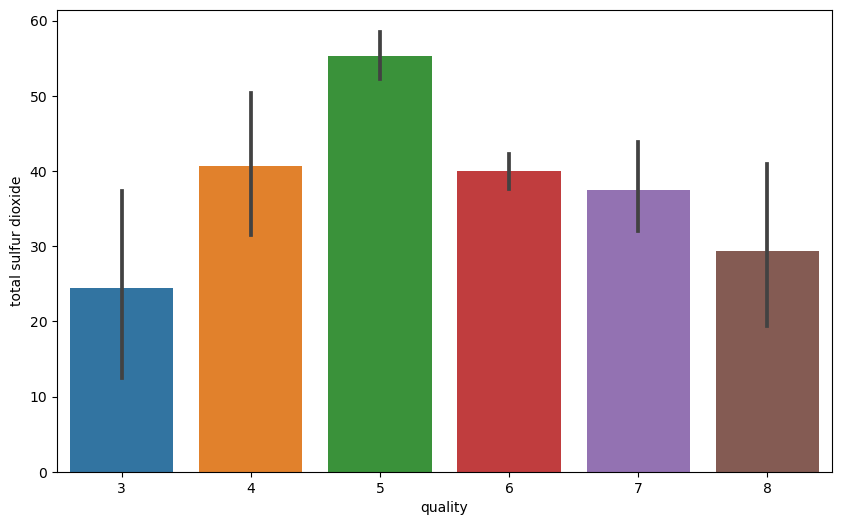

In [48]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = Wine)

<Axes: xlabel='quality', ylabel='sulphates'>

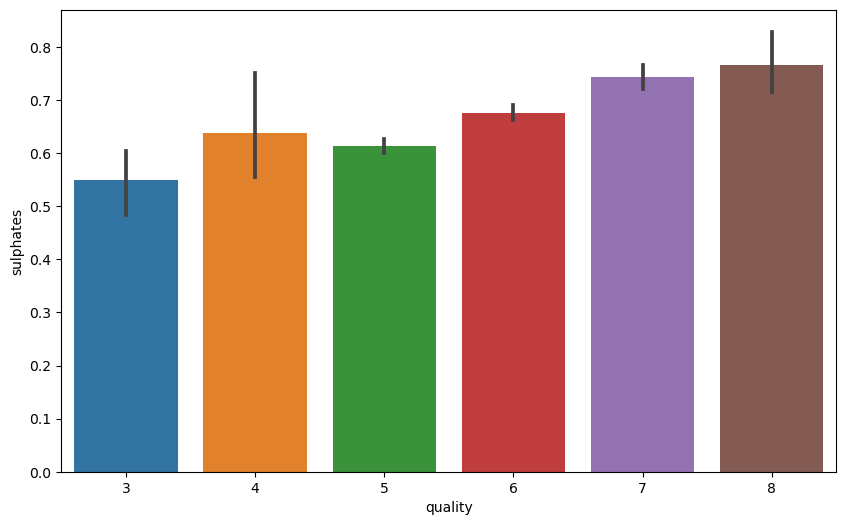

In [50]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = Wine)

<Axes: xlabel='quality', ylabel='alcohol'>

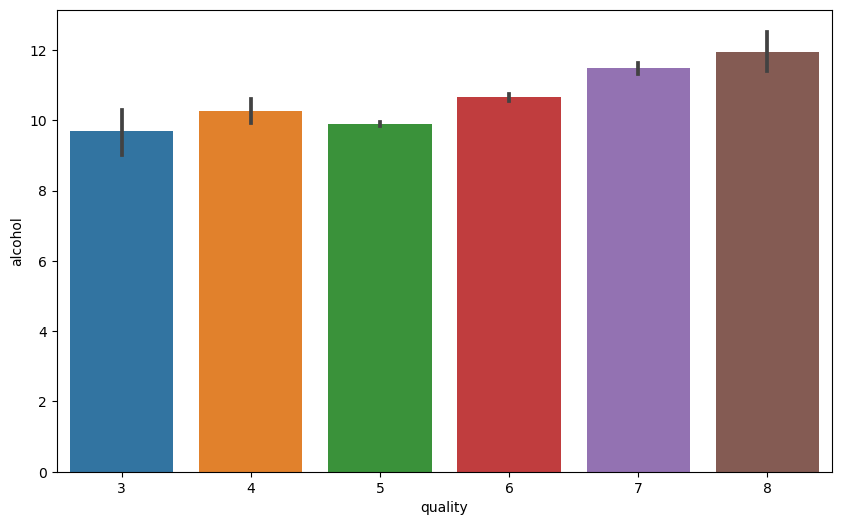

In [52]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = Wine)

In [55]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
Wine['quality'] = pd.cut(Wine['quality'], bins = bins, labels = group_names)

In [57]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [59]:
#Bad becomes 0 and good becomes 1 
Wine['quality'] = label_quality.fit_transform(Wine['quality'])

In [61]:
Wine['quality'].value_counts()

quality
0    984
1    159
Name: count, dtype: int64

<Axes: ylabel='count'>

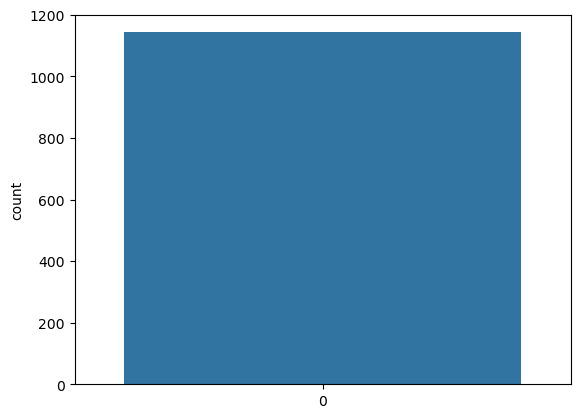

In [63]:
sns.countplot(Wine['quality'])

In [65]:
#Now seperate the dataset as response variable and feature variabes
X = Wine.drop('quality', axis = 1)
y = Wine['quality']

In [67]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [69]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [71]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [75]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

y_rfc = rfc.predict(X_test)

accuracy_rfc = accuracy_score(y_test, y_rfc)

In [76]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.98      0.94       201
           1       0.67      0.36      0.47        28

    accuracy                           0.90       229
   macro avg       0.79      0.67      0.70       229
weighted avg       0.89      0.90      0.89       229



In [80]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[196   5]
 [ 18  10]]


In [83]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)


y_sgd = sgd.predict(X_test)

accuracy_sgd = accuracy_score(y_test, y_sgd)

In [85]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       201
           1       0.00      0.00      0.00        28

    accuracy                           0.88       229
   macro avg       0.44      0.50      0.47       229
weighted avg       0.77      0.88      0.82       229



In [88]:
print(confusion_matrix(y_test, pred_sgd))

[[201   0]
 [ 28   0]]


In [91]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)


y_svc = svc.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_svc)

In [93]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       201
           1       0.64      0.25      0.36        28

    accuracy                           0.89       229
   macro avg       0.77      0.62      0.65       229
weighted avg       0.87      0.89      0.87       229



In [97]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_svc.fit(X_train, y_train)

In [ ]:
#Best parameters for our svc model
grid_svc.best_params_

In [ ]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.8, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

In [ ]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

In [ ]:
features = ["fixed acidity","volatile acidity","citric acid","chlorides","total sulfur dioxide","density","sulphates","alcohol","residual sugar","free sulfur dioxide","pH"]  
quality_potential = 'quality' 


for feature in features:
    plt.figure(figsize=(3, 3)) 
    plt.scatter(dataset[feature], dataset[quality_potential], alpha=0.5)
    plt.title(f'{feature} vs quality_potential')
    plt.xlabel(feature)
    plt.ylabel('quality_potential')
    plt.grid(True)
    plt.show()

In [ ]:
import seaborn as sns
corr_mat = dataset.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_mat, annot=True, cmap='rocket', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
#Outlier treatment

def display_boxplots(dataset):
    for column in dataset.columns:
        plt.figure()
        plt.boxplot(dataset[column])
        plt.title(f'Boxplot of {column}')
        plt.show()

def drop_outliers_iqr(dataset, threshold=1):
    filtered_df = pd.DataFrame()
    for column in dataset.columns:
        Q1 = dataset[column].quantile(0.25)
        Q3 = dataset[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        filtered_df[column] = dataset[(dataset[column] >= lower_bound) & (dataset[column] <= upper_bound)][column]
    return filtered_df

# Example usage:
# Assuming we have a dataframe called 'df'
filtered_df = drop_outliers_iqr(dataset)
filtered_df = filtered_df.dropna()
display_boxplots(filtered_df)

In [ ]:
features = ["fixed acidity","volatile acidity","citric acid","chlorides","total sulfur dioxide","density","sulphates","alcohol","residual sugar","free sulfur dioxide","pH"]  
quality_potential = 'quality' 


for feature in features:
    plt.figure(figsize=(3, 3)) 
    plt.scatter(filtered_df[feature], filtered_df[quality_potential], alpha=0.5)
    plt.title(f'{feature} vs quality_potential')
    plt.xlabel(feature)
    plt.ylabel('quality_potential')
    plt.grid(True)
    plt.show()